In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import Counter


def subset_sum_fptas_full(S, T, epsilon=0.01, show_graph=True):
    L = [(0, [])]  # (sum, subset)
    all_steps = []

    for x in S:
        new_sums = [(val + x, subset + [x]) for val, subset in L]
        merged = merge_and_trim_full(L + new_sums, epsilon)
        L = [item for item in merged if item[0] <= T]

        if show_graph:
            all_steps.append((x, [val for val, _ in L]))

    # All subsets with max sum
    max_sum = max(val for val, _ in L)
    valid_subsets = [subset for val, subset in L if val == max_sum]
    best_subset = min(valid_subsets, key=len)

    if show_graph:
        plot_better_graphs(S, all_steps, max_sum, best_subset, T)


    return max_sum, valid_subsets, best_subset

In [2]:

def merge_and_trim_full(L, epsilon):
    L.sort()
    trimmed = [L[0]]
    for current in L[1:]:
        if current[0] > trimmed[-1][0] * (1 + epsilon):
            trimmed.append(current)
    return trimmed

In [3]:
# def plot_fptas_growth (all_steps, T):
#     plt.figure(figsize=(10, 6))
#     for i, (x, sums) in enumerate(all_steps):
#         plt.plot(sums, 'o-', label=f"Step {i+1} (add {x})")
#     plt.axhline(y=T, color='red', linestyle='--', label=f"Target T = {T}")
#     plt.title("Subset Sum Growth Over Steps (FPTAS)")
#     plt.xlabel("Index in trimmed list")
#     plt.ylabel("Subset Sum Value")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()



def plot_better_graphs(S, all_steps, max_sum, best_subset, T):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    # Graph 1: Growth of max subset sum over steps
    steps = list(range(1, len(all_steps) + 1))
    max_values = [max(sums) for _, sums in all_steps]

    # Plot shaded line
    axes[0].fill_between(steps, max_values, color='lightgreen', alpha=0.6)
    axes[0].plot(steps, max_values, marker='o', color='green', linewidth=2, label='Max Sum So Far')

    # Add labels on points
    for i, val in enumerate(max_values):
        axes[0].text(steps[i], val + 0.3, str(val), ha='center', fontsize=9)

    # Highlight target T
    axes[0].axhline(y=T, color='red', linestyle='--', label=f"Target T = {T}")

    # If we reach or cross T, mark that point
    for i, val in enumerate(max_values):
        if val >= T:
            axes[0].scatter(steps[i], val, color='blue', s=100, zorder=5)
            axes[0].text(steps[i], val - 1, "Reached 🎯", color='blue', ha='center')
            break

    # Graph styling
    axes[0].set_title("📈 Growth of Max Subset Sum Per Step (Improved)")
    axes[0].set_xlabel("Step (Added Element Index)")
    axes[0].set_ylabel("Maximum Subset Sum Found")
    axes[0].legend()
    axes[0].grid(True)

    # Graph 2: Element frequency in best subset
    if best_subset:
        unique = list(dict.fromkeys(best_subset))
        counts = [best_subset.count(x) for x in unique]
        axes[1].barh([str(x) for x in unique], counts, color='steelblue')
        axes[1].set_title("Element Frequency in Best Subset")
        axes[1].set_xlabel("Count")
        axes[1].set_ylabel("Elements")
        for i, v in enumerate(counts):
            axes[1].text(v + 0.1, i, str(v), color='black', va='center')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_57523/1949023286.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_57523/1949023286.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/rahul/Project/Advanced_Data_Structure_Micro_Project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rahul/Project/Advanced_Data_Structure_Micro_Project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


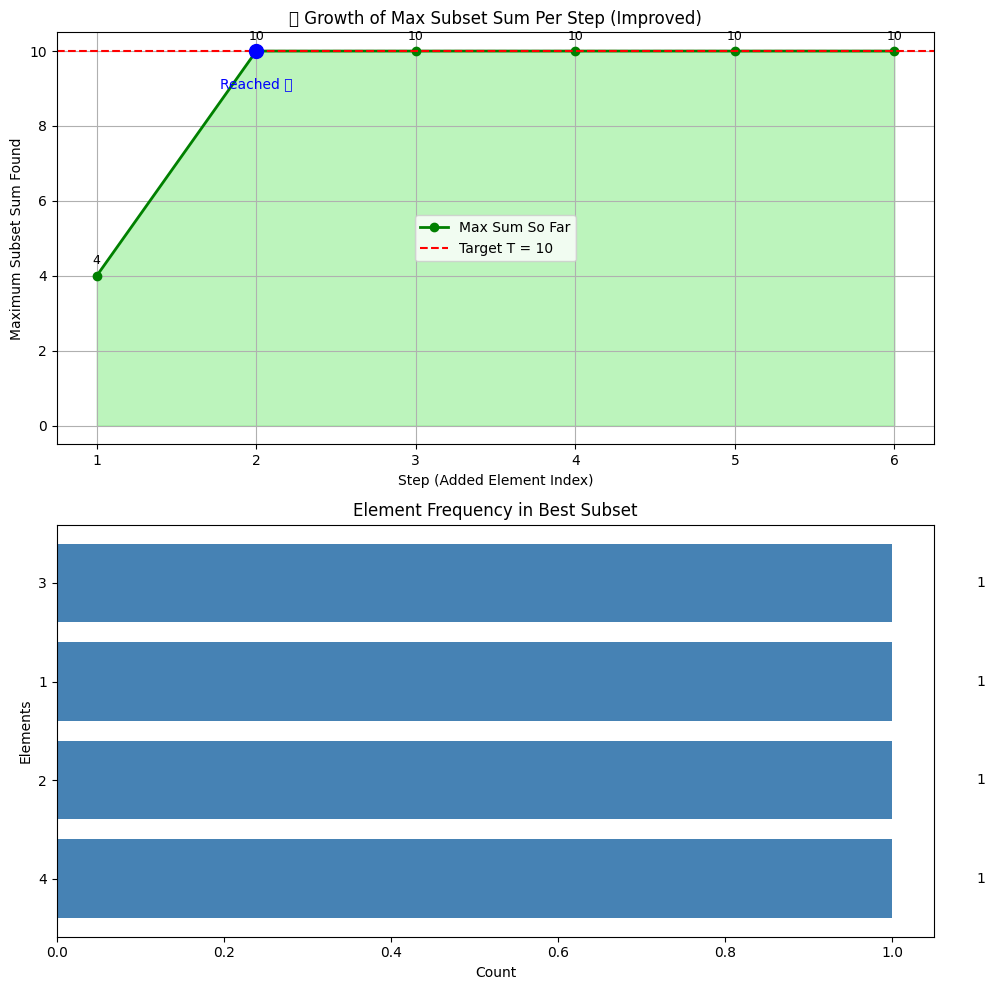

✅ Approximate Max Sum: 10
📋 All Subsets with Sum = 10
  1. [4, 2, 1, 3]
🏆 Best Subset (shortest): [4, 2, 1, 3]


In [4]:
S = [4, 10, 2,1, 12, 3]
T = 10
epsilon = 0.01

max_sum, valid_subsets, best_subset = subset_sum_fptas_full(S, T, epsilon)

print("✅ Approximate Max Sum:", max_sum)
print("📋 All Subsets with Sum =", max_sum)
for i, subset in enumerate(valid_subsets, 1):
    print(f"  {i}. {subset}")
print("🏆 Best Subset (shortest):", best_subset)


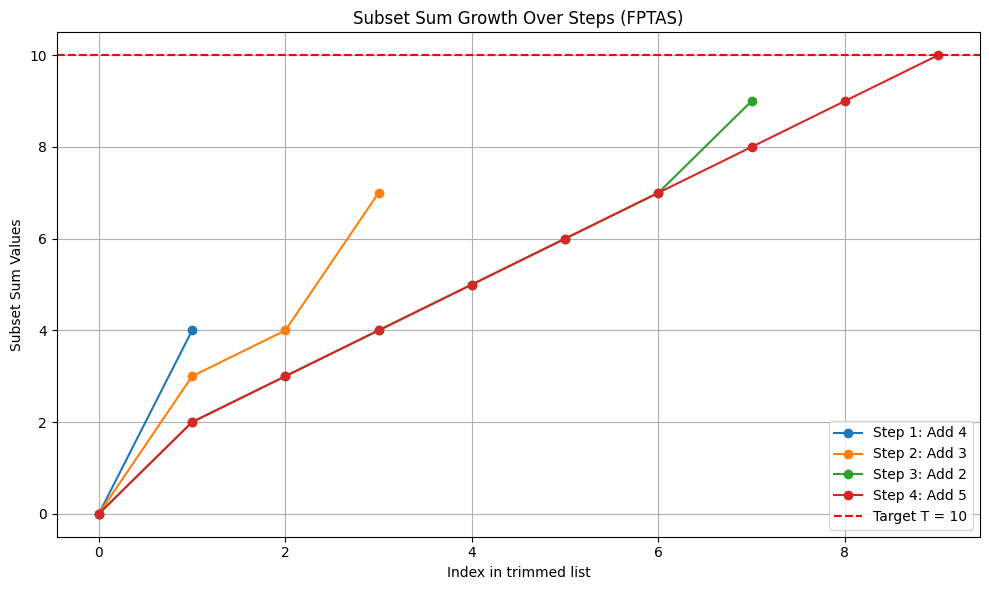

✅ Approximate Max Sum Found: 10

📋 All Subsets with Max Sum:
  1. [3, 2, 5]

🏆 Best Subset (Shortest): [3, 2, 5]


In [1]:
import matplotlib.pyplot as plt

def subset_sum_fptas_with_graph(S, T, epsilon=0.01):
    L = [(0, [])]  # (sum, subset)
    all_steps = []  # For graphing

    for x in S:
        new_sums = [(val + x, subset + [x]) for val, subset in L]
        merged = merge_and_trim(L + new_sums, epsilon)
        L = [item for item in merged if item[0] <= T]
        all_steps.append((x, [val for val, _ in L]))  # record current values

    max_sum = max(val for val, _ in L)
    valid_subsets = [subset for val, subset in L if val == max_sum]
    best_subset = min(valid_subsets, key=len)

    plot_growth(all_steps, T)

    return max_sum, valid_subsets, best_subset


def merge_and_trim(L, epsilon):
    L.sort()
    trimmed = [L[0]]
    for current in L[1:]:
        if current[0] > trimmed[-1][0] * (1 + epsilon):
            trimmed.append(current)
    return trimmed


def plot_growth(all_steps, T):
    plt.figure(figsize=(10, 6))
    for i, (x, sums) in enumerate(all_steps):
        plt.plot(sums, marker='o', label=f"Step {i+1}: Add {x}")
    plt.axhline(y=T, color='red', linestyle='--', label=f"Target T = {T}")
    plt.title("Subset Sum Growth Over Steps (FPTAS)")
    plt.xlabel("Index in trimmed list")
    plt.ylabel("Subset Sum Values")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 🔍 Example usage
S = [4, 3, 2, 5]
T = 10
epsilon = 0.01

max_sum, valid_subsets, best_subset = subset_sum_fptas_with_graph(S, T, epsilon)

print("✅ Approximate Max Sum Found:", max_sum)
print("\n📋 All Subsets with Max Sum:")
for i, subset in enumerate(valid_subsets, 1):
    print(f"  {i}. {subset}")
print("\n🏆 Best Subset (Shortest):", best_subset)


Approximate subset sum ≤ 9 is: 9
Subset: [3, 6]


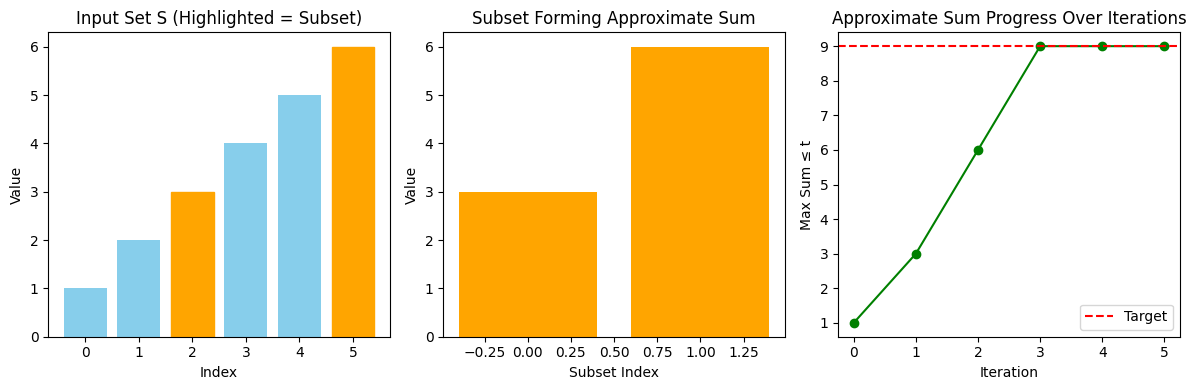

In [1]:
import matplotlib.pyplot as plt

def trim_with_paths(lst, delta):
    trimmed = [lst[0]]
    for val in lst[1:]:
        if val[0] > trimmed[-1][0] * (1 + delta):
            trimmed.append(val)
    return trimmed

def approximate_subset_sum(S, t, epsilon):
    n = len(S)
    L = [(0, [])]
    history = []  # Store best sums over iterations
    
    for i in range(n):
        new_L = []
        for (total, subset) in L:
            new_sum = total + S[i]
            new_subset = subset + [S[i]]
            new_L.append((new_sum, new_subset))
        L += new_L
        L = list({x[0]: x for x in L}.values())
        L.sort(key=lambda x: x[0])
        delta = epsilon / (2 * n)
        L = trim_with_paths(L, delta)
        L = [x for x in L if x[0] <= t]
        if L:
            history.append(max(x[0] for x in L))
    
    if L:
        best = max(L, key=lambda x: x[0])
        return best, history
    else:
        return (0, []), history

def visualize(S, subset, approx_sum, history, t):
    # 1. Bar chart of the set
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    bars = plt.bar(range(len(S)), S, color='skyblue')
    for i, val in enumerate(S):
        if val in subset:
            bars[i].set_color('orange')
    plt.title("Input Set S (Highlighted = Subset)")
    plt.xlabel("Index")
    plt.ylabel("Value")

    # 2. Subset bar
    plt.subplot(1, 3, 2)
    plt.bar(range(len(subset)), subset, color='orange')
    plt.title("Subset Forming Approximate Sum")
    plt.xlabel("Subset Index")
    plt.ylabel("Value")

    # 3. Approximation Progress
    plt.subplot(1, 3, 3)
    plt.plot(history, marker='o', color='green')
    plt.axhline(t, color='red', linestyle='--', label='Target')
    plt.title("Approximate Sum Progress Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Max Sum ≤ t")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example Usage
if __name__ == "__main__":
    S = [1, 2, 3, 4, 5, 6]
    t = 9
    epsilon = 0.001

    (approx_sum, subset), history = approximate_subset_sum(S, t, epsilon)
    print("Approximate subset sum ≤", t, "is:", approx_sum)
    print("Subset:", subset)
    visualize(S, subset, approx_sum, history, t)
